In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('seaborn-talk')
import numpy as np
import pandas as pd
from scipy.fftpack import fft
from scipy import signal

In [3]:
source = r"/Users/Mahad/Downloads/drive-download-20200317T004709Z-001/Centroids_Relevant"
outpath = r"/Users/Mahad/Downloads/drive-download-20200317T004709Z-001/Centroid_Filtered"

In [4]:
def gaussian(x,y):
    gauss = signal.gaussian(10,3)
    x_gauss = signal.convolve(x, gauss, mode='same', method = 'direct') / gauss.sum()
    y_gauss = signal.convolve(y, gauss, mode = 'same', method = 'direct') / gauss.sum()
    return(x_gauss, y_gauss)

In [5]:
def Tortuosity(x, time):
    
    
    t = time/100
    
    Nx = len(x)  #number of points
    
    Time = t[-1]-t[0]   #total sample time (in seconds)c
    fs = Nx/Time   # sample frequency
    TT = 1/fs  #delta t.
    meanx = np.mean(x)
    
    # . fftxvel is complex with real and imaginary part.
    #Nyquist spacing (first half of Fourier) -- the list of frequencies for which we have Fourier coefficients
    fftx = fft(x-meanx)    # this is the Fourier tranform of the x velocity
    xf = np.linspace(0.0, 1.0/(2.0*TT), Nx//2)  

    
    return xf, Nx, fftx

In [6]:
df = pd.read_csv(source + '//Sham_1_4_17684.csv')
x, y, time = df.X_position.values, df.Y_position.values, df.FrameNumber.values
x_gauss, y_gauss = gaussian(x,y)

In [7]:
xf, Nx, fftx  = Tortuosity(x,time)  # < --- no filter
yf, Ny, ffty = Tortuosity(y,time)
sum_xy = (2.0/Ny * np.abs(ffty[0:Ny//2]) + 2.0/Nx * np.abs(fftx[0:Nx//2]))

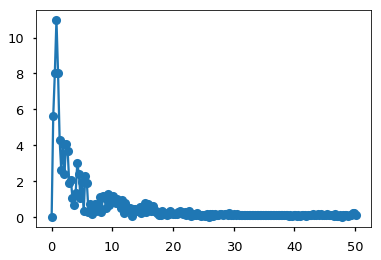

In [8]:
plt.plot(xf, 2.0/Nx * np.abs(fftx[0:Nx//2]), "-o")

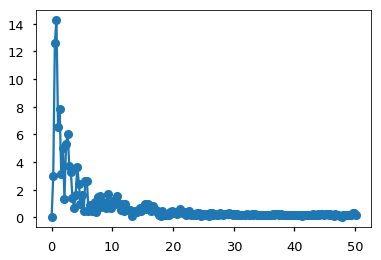

In [9]:
plt.plot(yf, 2.0/Ny * np.abs(ffty[0:Ny//2]), "-o")

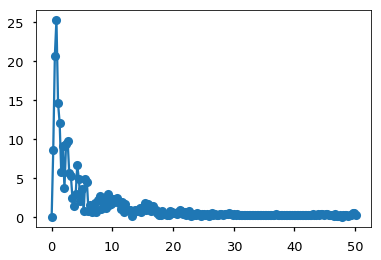

In [10]:
plt.plot(yf, sum_xy, "-o" )